In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [33]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
df.shape

(1470, 35)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [36]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [39]:
df['Attrition'].value_counts(normalize=True) * 100

,proportion
Attrition,
No,83.877551
Yes,16.122449


In [40]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

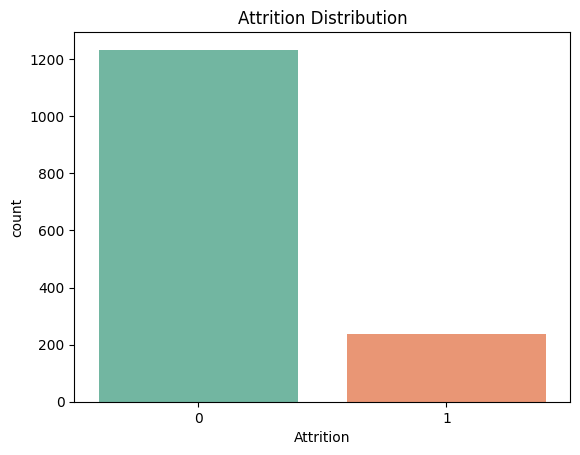

In [41]:
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title('Attrition Distribution')
plt.show()

In [42]:
df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], inplace=True)

In [43]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [44]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [45]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,...,True,False,False,False,False,False,False,True,False,False


In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [47]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [49]:
smote = SMOTE(random_state=42, sampling_strategy=0.7)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [50]:
y_train.value_counts()

,count
Attrition,
0,986
1,190


In [51]:
 y_train_smote.value_counts()

,count
Attrition,
0,986
1,690


In [67]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced')

In [68]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [69]:
# 📌 Predict on training set
y_train_pred = model.predict(X_train_smote)

# 🔍 Evaluate on training set
train_acc = accuracy_score(y_train_smote, y_train_pred)
train_prec = precision_score(y_train_smote, y_train_pred)
train_rec = recall_score(y_train_smote, y_train_pred)
train_f1 = f1_score(y_train_smote, y_train_pred)

print("📊 Training Set Metrics:")
print(f"🔹 Accuracy  : {train_acc:.4f}")
print(f"🔹 Precision : {train_prec:.4f}")
print(f"🔹 Recall    : {train_rec:.4f}")
print(f"🔹 F1 Score  : {train_f1:.4f}")

📊 Training Set Metrics:
🔹 Accuracy  : 0.6641
🔹 Precision : 0.5777
🔹 Recall    : 0.6841
🔹 F1 Score  : 0.6264


In [70]:
y_pred = model.predict(X_test)

In [71]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [72]:
print("🔹 Accuracy      :", round(acc, 4))
print("🔹 Precision     :", round(prec, 4))
print("🔹 Recall        :", round(rec, 4))
print("🔹 F1 Score      :", round(f1, 4))

🔹 Accuracy      : 0.5714
🔹 Precision     : 0.203
🔹 Recall        : 0.5745
🔹 F1 Score      : 0.3


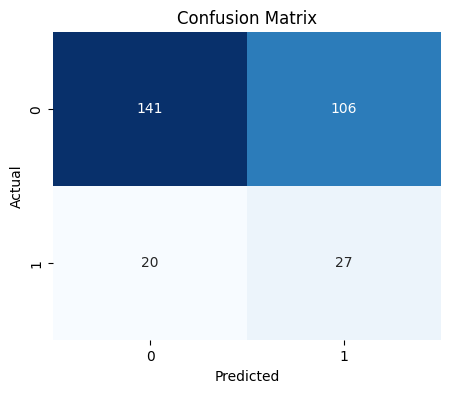

In [73]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [74]:
# 📄 Classification Report
print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred))


📄 Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.57      0.69       247
           1       0.20      0.57      0.30        47

    accuracy                           0.57       294
   macro avg       0.54      0.57      0.50       294
weighted avg       0.77      0.57      0.63       294



In [75]:
print("📊 Training Set Metrics:")
print(f"🔹 Accuracy  : {train_acc:.4f}")
print(f"🔹 Precision : {train_prec:.4f}")
print(f"🔹 Recall    : {train_rec:.4f}")
print(f"🔹 F1 Score  : {train_f1:.4f}")

# ⚖️ You already have test set metrics — compare now
print("\n📊 Test Set Metrics:")
print(f"🔹 Accuracy  : {acc:.4f}")
print(f"🔹 Precision : {prec:.4f}")
print(f"🔹 Recall    : {rec:.4f}")
print(f"🔹 F1 Score  : {f1:.4f}")

📊 Training Set Metrics:
🔹 Accuracy  : 0.6641
🔹 Precision : 0.5777
🔹 Recall    : 0.6841
🔹 F1 Score  : 0.6264

📊 Test Set Metrics:
🔹 Accuracy  : 0.5714
🔹 Precision : 0.2030
🔹 Recall    : 0.5745
🔹 F1 Score  : 0.3000
